# K-Drama Recommendation System

## Project Overview

*Korean Drama* (K-Drama) adalah salah satu komoditas ekspor Korea Selatan dalam bidang seni dan hiburan. K-Drama juga merupakan salah satu penyebab terjadinya *Korean Wave* (*Hallyu*) Jilid I pada tahun 2000-an [1]. Hallyu Jilid I ditandai oleh menyebarnya popularitas K-Drama ke luar negara Korea Selatan, yaitu ke negara Asia lainnya [2]. Pada tahun 2005, misalnya, K-Drama mengisi sebesar 96,2 persen dari keseluruhan ekspor program televisi Korea Selatan dalam bidang hiburan [3]. Hal ini menunjukkan bahwa K-Drama merupakan jenis hiburan yang disenangi pada masa itu.<br>

Meskipun demikian, memasuki tahun 2010-an terjadi penurunan popularitas dari K-Drama. Pada 2012, porsi K-Drama dalam ekspor program televisi Korea Selatan menurun menjadi sekitar 85 persen [3]. Meskipun mengalami penurunan, K-Drama tetap menjadi konten hiburan yang menarik konsumen di pasar internasional. Dalam *White Paper of the Korean Broadcast Industry*, pada 2015, lisensi K-Drama behasil dijual ke negara non-Asia seperti Amerika Serikat (4.291 judul), Romania (299 judul), dan Belgium (261 judul) [4]. 

Saat ini, dengan munculnya layanan *streaming* seperti Netflix, HBO Max, dan Disney Plus, K-Drama tetap menjadi konten hiburan populer dan menguntungkan. Satu contoh kasus adalah bagaimana K-Drama berjudul *Squid Game* dari Netflix berhasil menjadi salah satu konten paling ditonton di layanan tersebut pada 2021 [5]. K-Drama ini bahkan meninggalkan jejak kultural setelah penayangannya [6].

Berdasarkan latar belakang tersebut, dalam proyek ini akan dibuat sebuah sistem untuk merekomendasikan tayangan K-Drama. Rekomendasi akan membantu konsumen yang baru mencoba menonton K-Drama agar tidak kebingungan dalam memilih. Dengan begitu, hal ini akan membantu penyedia konten dalam memamerkan katalog K-Drama yang dimilikinya. 

**Referensi** <br>
[1] Jeong, J. (2012). Ethnoscapes, mediascapes, and ideoscapes: Socio-cultural relations between South Korea and China.
Journal of International and Area Studies, 19(2), 77–95. <br>
[2] Madrid-Morales, D., & Lovric, B. (2015). Transatlantic connection: K-pop and K-drama fandom in Spain and
Latin America. Journal of Fandom Studies, 3(1), 23–41. <br>
[3] Ju, H. (2017). National television moves to the region and beyond: South Korean TV drama production with a
new cultural act. Journal of International Communication, 23(1), 94–114. <br>
[4] Ministry of Science, ICT, and Future Planning & Korean Communication Commission. (2016). White paper of
Korean broadcast industry. Seoul, Korea: MSIF. <br>
[5] Solsman, J.E. (2021) Netflix's squid game was even bigger than you thought -- 2.1B hours big, CNET. CNET. Available at: https://www.cnet.com/culture/entertainment/netflix-squid-game-is-even-bigger-than-you-thought-2-billion-hours-big/#:~:text=Squid%20Game%2C%20at%201.65%20billion,anything%20else%20Netflix%20has%20released. (Accessed: October 24, 2022). <br>
[6] Siregar, N., Angin, A. B. P., & Mono, U. (2021). The Cultural Effect of Popular Korean Drama: Squid Game. IDEAS: Journal on English Language Teaching and Learning, Linguistics and Literature, 9(2), 445-451. <br>

## Business Understanding

### Problem Statements

K-Drama merupakan komoditas hiburan yang populer dan disukai oleh konsumen konten hiburan. Jumlah judul K-Drama, sejak awal penyebarannya di awal  2000-an, bisa mencapai ribuan. Hal ini tentu dapat membingungkan konsumen dalam memilih judul K-Drama. Oleh karena itu, diperlukan sebuah sistem untuk merekomendasikan judul K-Drama agar memudahkan konsumen dalam mengakses konten-konten tersebut.

### Goals

Pada proyek ini akan dibuat sebuah sistem rekomendasi yang akan merekomendasikan K-Drama berdasarkan *genre dan rating-nya* sehingga dapat membantu konsumen dalam memilih judul K-Drama yang akan ditonton.

### Solution Approach

Ada dua solusi yang diusulkan untuk menyelesaikan proyek ini:
1. Content Based Filtering
2. Collaborative Filtering

Pada solusi pertama, sistem rekomendasi akan dibangun berdasarkan karakteristik K-Drama yang telah dinilai atau diminati oleh konsumen. Sementara itu, pada solusi kedua, rekomendasi akan diberikan berdasarkan penilian dari seluruh konsumen yang pernah melihat dan menilai K-Drama.

## Data Understanding

Data yang digunakan adalah *IMDb Korean TV Series* yang dapat diunduh dari [Kaggle](https://www.kaggle.com/datasets/chanoncharuchinda/imdb-korean-tv-series?select=koreanTV.csv). Data ini berisi daftar seri televisi Korea yang diperoleh melalui proses *web scraping* dari situs IMDb. Situs ini memuat informasi dan rating dari film dan juga seri televisi.

Pada *dataset* tersebut, terdapat dua berkas *comma-separated value* (CSV). Berkas pertama bernama *koreanTV.csv* yang berisi informasi terkait seri televisi Korea di IMDB. Berkas ini berisi 1.989 data. Sementara itu, berkas kedua bernama *koreanTV_comment.csv* yang berisi komentar dan *rating* dari pengguna situs IMDb. Berkas ini berisi 8.275 data.

Pada berkas pertama, informasi dari masing-masing kolom adalah sebagai berikut:
* Title : judul seri televisi;
* Year : tahun rilis seri;
* Rating : rating yang diberikan pengguna;
* Votes : berapa banyak pengguna yang memberikan rating;
* Time : lama satu episode;
* Genre : daftar genre dari seri;
* Stars : daftar pemain dalam seri;
* Short Story : sinopsis dari seri.

Sementara itu, dalam berkas kedua, informasi dari masing-masing kolom adalah sebagai berikut:
* Title : judul seri televisi;
* Review Title : judul dari reviu pengguna;
* User Rating : rating yang diberikan pemberi reviu;
* Content: isi dari reviu pengguna
* Helpfullness Vote: berapa pengguna yang menganggap reviu tersebut membantu.


In [ ]:
# Import Required Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from pathlib import Path

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


import os
from google.colab import drive
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Mount Gdrive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
# Unzip dataset
!unzip /content/gdrive/MyDrive/Training/Dicoding/Dataset/Korean_Drama/archive.zip 

Archive:  /content/gdrive/MyDrive/Training/Dicoding/Dataset/Korean_Drama/archive.zip
replace koreanTV.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: koreanTV.csv            
replace koreanTV_comment.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: koreanTV_comment.csv    


In [ ]:
%pwd

'/content'

### Berkas Pertama

**Exploratory Data Analysis (EDA)**

Di sini, berkas pertama memiliki beberapa nilai yang tidak terdefinisi seperti "-". Oleh karena itu, hal pertama yang dilakukan adalah mendefinisikan nilai tersebut sebagai nilai hilang (*missing values*) saat melakukan *loading* data. 

Selain itu, nama dari beberapa kolom terlalu panjang dan kurang rapi. Oleh karena itu, dilakukan perubahan nama kolom menjadi 'Title', 'Year', 'Final Rating', 'Total Votes', 'Duration', 'Genre', 'Stars', dan 'Synopsis'.

In [ ]:
# Define Missing Values
missing_values = ["?", "--", '!', '^', '-', '_', ' ']

# Load data
data1 = pd.read_csv("koreanTV.csv", na_values = missing_values)
data1.head()

,Title,Year,Rating,Votes:,Time,Genre,Stars,Short Story
0,Hellbound,(2021– ),6.7,"14,032",150 min,"Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,(2021– ),8.1,"339,931",55 min,"Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,(2021– ),7.9,"12,877",50 min,"Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,(2015– ),7.7,"9,439",20 min,"Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,(2021– ),8.6,921,NaN,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...


In [ ]:
# Rename columns
data1.columns = ['Title', 'Year', 'Final Rating', 'Total Votes', 'Duration', 'Genre', 'Stars', 'Synopsis']
data1.head()

,Title,Year,Final Rating,Total Votes,Duration,Genre,Stars,Synopsis
0,Hellbound,(2021– ),6.7,"14,032",150 min,"Crime, Drama, Fantasy","Yoo Ah-in, Kim Hyun-joo, Jeong Min Park, Jin-a...",\nPeople hear predictions on when they will di...
1,Squid Game,(2021– ),8.1,"339,931",55 min,"Action, Drama, Mystery","Lee Jung-jae, Park Hae-soo, Wi Ha-Joon, Jung H...",\nHundreds of cash-strapped players accept a s...
2,My Name,(2021– ),7.9,"12,877",50 min,"Action, Crime, Drama","Hee-soon Park, Ahn Bo-Hyun, Han So-hee, Kim Sa...",\nThe story about a woman who joins an organiz...
3,Miraculous: Tales of Ladybug & Cat Noir,(2015– ),7.7,"9,439",20 min,"Animation, Action, Adventure","Cristina Valenzuela, Bryce Papenbrook, Keith S...","\nMarinette and Adrien, two normal teens, tran..."
4,Happiness,(2021– ),8.6,921,NaN,"Action, Fantasy, Thriller","Han Hyo-joo, Park Hyung-Sik, Woo-jin Jo, Lee J...",\nAn apocalyptic thriller that takes place in ...


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1989 non-null   object 
 1   Year          1978 non-null   object 
 2   Final Rating  1485 non-null   float64
 3   Total Votes   1485 non-null   object 
 4   Duration      1068 non-null   object 
 5   Genre         1903 non-null   object 
 6   Stars         1447 non-null   object 
 7   Synopsis      1989 non-null   object 
dtypes: float64(1), object(7)
memory usage: 124.4+ KB


In [ ]:
data1.isna().sum()

Title             0
Year             11
Final Rating    504
Total Votes     504
Duration        921
Genre            86
Stars           542
Synopsis          0
dtype: int64

Pada data di atas, diketahui bahwa beberapa kolom memiliki sejumlah nilai yang hilang. Meskipun demikian, karena sistem rekomendasi akan dibangun dengan mempertimbangkan *rating dan genre*, kolom dengan banyak nilai hilang akan dibuang terlebih dahulu. Setelah itu, baru dilakukan pembuangan data menurut baris dengan data yang hilang.

In [ ]:
# Drop columns with large missing values
data1.drop(['Duration', 'Stars'], axis = 1, inplace=True)

data1.isna().sum()

Title             0
Year             11
Final Rating    504
Total Votes     504
Genre            86
Synopsis          0
dtype: int64

In [ ]:
# Drop the remaining rows with missing values
data1.dropna(axis=0, how='any', inplace=True)

data1.isna().sum()

Title           0
Year            0
Final Rating    0
Total Votes     0
Genre           0
Synopsis        0
dtype: int64

In [ ]:
# Check the data
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1472 non-null   object 
 1   Year          1472 non-null   object 
 2   Final Rating  1472 non-null   float64
 3   Total Votes   1472 non-null   object 
 4   Genre         1472 non-null   object 
 5   Synopsis      1472 non-null   object 
dtypes: float64(1), object(5)
memory usage: 80.5+ KB


In [ ]:
# Check the final rating distribution
data1.describe()

,Final Rating
count,1472.000000
mean,7.374185
std,0.870078
min,1.800000
25%,7.000000
50%,7.500000
75%,7.900000
max,10.000000


**Visualization**

[]

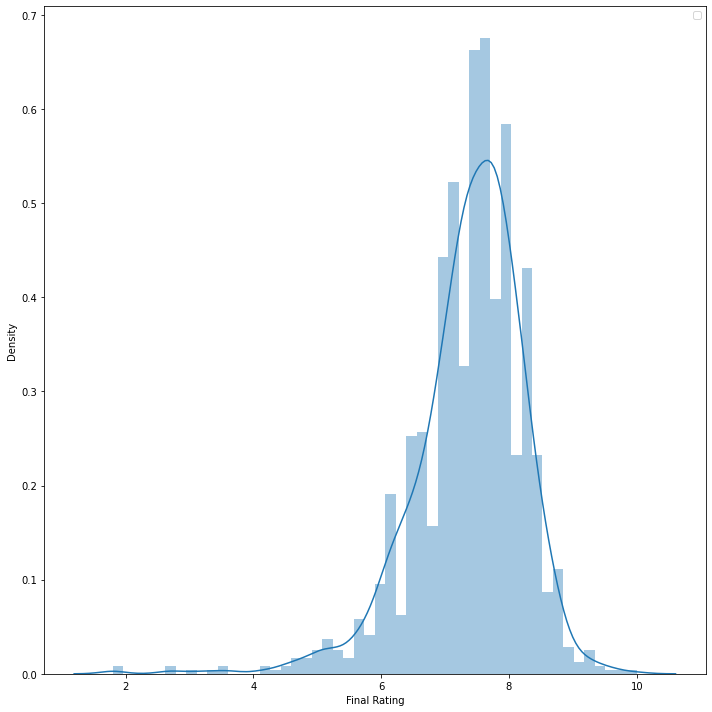

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data1["Final Rating"])
plt.xlabel("Final Rating")
plt.legend()

plt.tight_layout()
plt.savefig('finalrating_distribution.png')
plt.plot()

[]

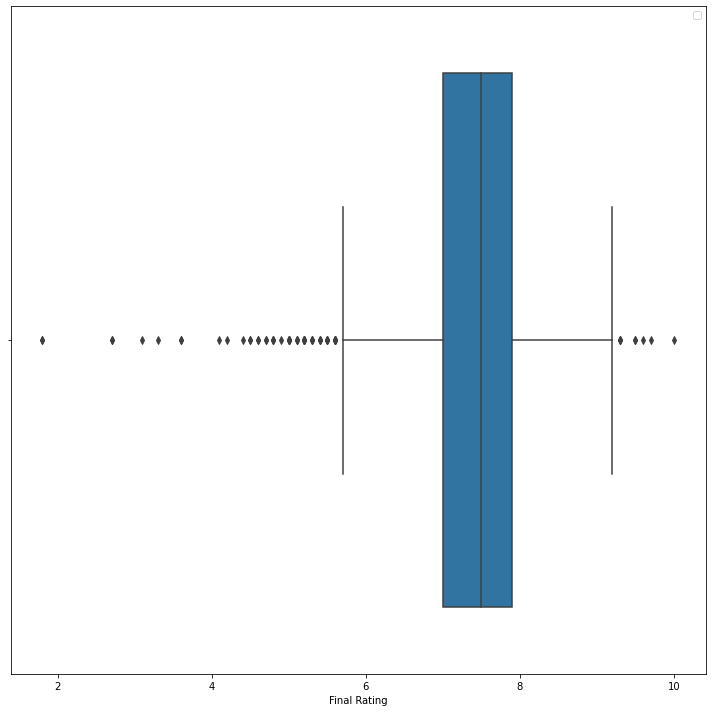

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data1["Final Rating"])
plt.xlabel("Final Rating")
plt.legend()

plt.tight_layout()
plt.savefig('finalrating_box.png')
plt.plot()

Dari visualisasi yang telah dilakukan, diketahui bahwa untuk berkas pertama, distribusi nilai *Final Rating* terpusat di sekitar angka 8. Hal ini dapat dilihat dari *distribution plot*. Selain itu, dari *boxplot*, diketahui bahwa data *Final Rating* juga memuat beberapa nilai *outliers*.

### Berkas Kedua

**Exploratory Data Analysis (EDA)**

In [ ]:
# Define Missing Values
missing_values = ["?", "--", '!', '^', '-', '_', ' ']

# Load data
data2 = pd.read_csv("koreanTV_comment.csv", na_values = missing_values)
data2.head()

,Title,Review Title,User Rating,Content,Helpfulness Vote
0,Hellbound,Did I watch the same show?,8/10,I felt compelled to write a review based on th...,37 out of 41
1,Hellbound,what i think...,8/10,"This show is amazing, I think people are hell-...",19 out of 20
2,Hellbound,Overwhelming technical shortcomings with ingen...,9/10,"When I saw the CG monsters in the trailer, I t...",39 out of 44
3,Hellbound,Slow start but oh my god!,8/10,"Firstly, people who have posted there reviews ...",58 out of 72
4,Hellbound,A gripping series,9/10,I started just thinking of watching one episod...,105 out of 138


In [ ]:
# Rename columns
data2.columns = ['Title', 'Review Title', 'Rating', 'Review', 'Helpfulness']
data2.head()

,Title,Review Title,Rating,Review,Helpfulness
0,Hellbound,Did I watch the same show?,8/10,I felt compelled to write a review based on th...,37 out of 41
1,Hellbound,what i think...,8/10,"This show is amazing, I think people are hell-...",19 out of 20
2,Hellbound,Overwhelming technical shortcomings with ingen...,9/10,"When I saw the CG monsters in the trailer, I t...",39 out of 44
3,Hellbound,Slow start but oh my god!,8/10,"Firstly, people who have posted there reviews ...",58 out of 72
4,Hellbound,A gripping series,9/10,I started just thinking of watching one episod...,105 out of 138


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8275 entries, 0 to 8274
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         8275 non-null   object
 1   Review Title  8275 non-null   object
 2   Rating        7924 non-null   object
 3   Review        8275 non-null   object
 4   Helpfulness   8275 non-null   object
dtypes: object(5)
memory usage: 323.4+ KB


In [ ]:
data2.isna().sum()

Title             0
Review Title      0
Rating          351
Review            0
Helpfulness       0
dtype: int64

Pada data di atas, ditemukan nilai yang hilang pada kolom *Rating*. Oleh karena itu, di sini, baris dengan data yang hilang akan dibuang.

In [ ]:
# Drop the remaining rows with missing values
data2.dropna(axis=0, how='any', inplace=True)

data2.isna().sum()

Title           0
Review Title    0
Rating          0
Review          0
Helpfulness     0
dtype: int64

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7924 entries, 0 to 8274
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7924 non-null   object
 1   Review Title  7924 non-null   object
 2   Rating        7924 non-null   object
 3   Review        7924 non-null   object
 4   Helpfulness   7924 non-null   object
dtypes: object(5)
memory usage: 371.4+ KB


Pada data di atas, nilai pada kolom *Rating* masih bertipe object. Oleh karena itu, di sini, akan dilakukan konversi menjadi tipe data integer.

In [ ]:
data2['Rating'].unique()

array(['8/10', '9/10', '10/10', '7/10', '4/10', '3/10', '6/10', '1/10',
       '5/10', '2/10'], dtype=object)

In [ ]:
data2.reset_index(inplace = True, drop = True)

In [ ]:
rat_arr = []
for i in range(len(data2['Rating'].tolist())):
  rat_arr.append(data2.loc[i, 'Rating'].replace('/10', ''))

data2['Rating'] = pd.Series(rat_arr)

In [ ]:
# Convert to integer
data2['Rating'] = pd.to_numeric(data2['Rating'])
data2.head()

,Title,Review Title,Rating,Review,Helpfulness
0,Hellbound,Did I watch the same show?,8,I felt compelled to write a review based on th...,37 out of 41
1,Hellbound,what i think...,8,"This show is amazing, I think people are hell-...",19 out of 20
2,Hellbound,Overwhelming technical shortcomings with ingen...,9,"When I saw the CG monsters in the trailer, I t...",39 out of 44
3,Hellbound,Slow start but oh my god!,8,"Firstly, people who have posted there reviews ...",58 out of 72
4,Hellbound,A gripping series,9,I started just thinking of watching one episod...,105 out of 138


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7924 non-null   object
 1   Review Title  7924 non-null   object
 2   Rating        7924 non-null   int64 
 3   Review        7924 non-null   object
 4   Helpfulness   7924 non-null   object
dtypes: int64(1), object(4)
memory usage: 309.7+ KB


In [ ]:
data2.describe()

,Rating
count,7924.000000
mean,8.031424
std,2.440952
min,1.000000
25%,7.000000
50%,9.000000
75%,10.000000
max,10.000000


**Visualization**

[]

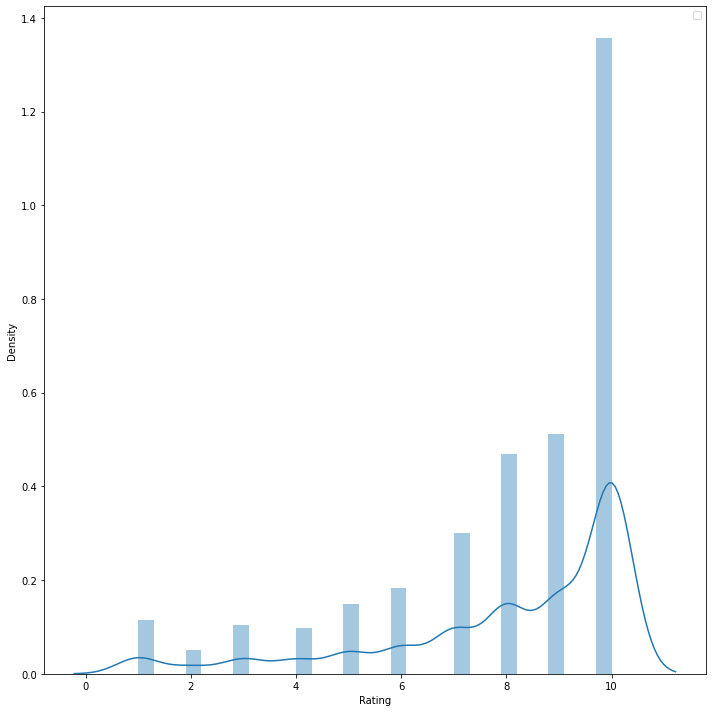

In [ ]:
plt.figure(figsize=(10,10))
sns.distplot(data2["Rating"])
plt.xlabel("Rating")
plt.legend()

plt.tight_layout()
plt.savefig('rating_distribution.png')
plt.plot()

[]

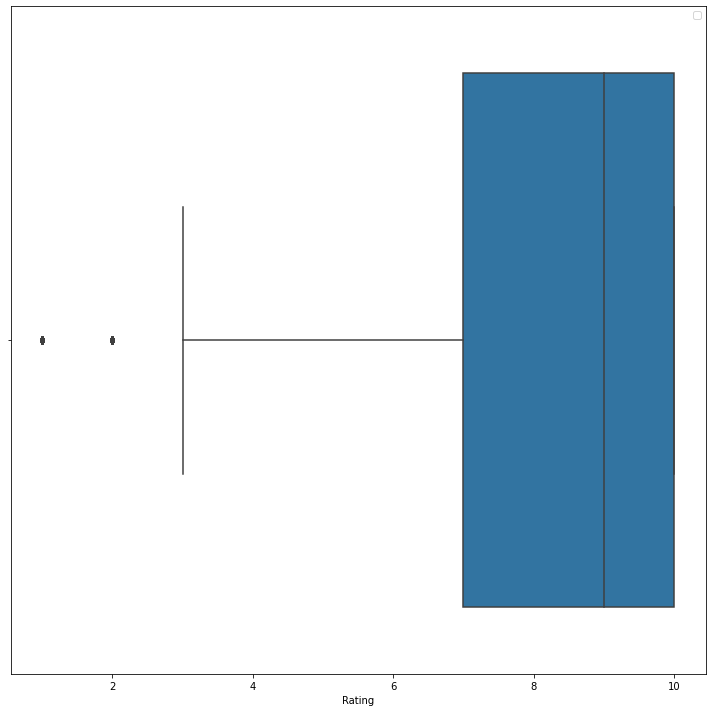

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data2["Rating"])
plt.xlabel("Rating")
plt.legend()

plt.tight_layout()
plt.savefig('rating_box.png')
plt.plot()

Sementara itu, untuk berkas kedua, nilai rating terpusat di angka 10 yang dapat diamati dari *distribution plot*. Nilai rating pada berkas kedua juga memiliki beberapa *outliers*.

## Data Preparation

### Berkas Pertama

**Menghilangkan Outliers**

Seperti telah disebutkan, pada berkas pertama terdapat *outliers* pada nilai *Final Rating*. Oleh karena itu, di sini, data akan dibersihkan dengan *metode Inter-Quantile Range (IQR)*.

In [ ]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR=Q3-Q1
data1=data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data1.shape

(1412, 6)

In [ ]:
data1.reset_index(inplace = True, drop = True)

**Membuang Judul Duplikat**

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1412 entries, 0 to 1411
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1412 non-null   object 
 1   Year          1412 non-null   object 
 2   Final Rating  1412 non-null   float64
 3   Total Votes   1412 non-null   object 
 4   Genre         1412 non-null   object 
 5   Synopsis      1412 non-null   object 
dtypes: float64(1), object(5)
memory usage: 66.3+ KB


In [ ]:
len(data1.Title.unique())

1406

Setelah dilakukan pengecekan, ternyata terdapat beberapa judul yang memiliki lebih dari satu entri. Oleh karena itu, di sini, baris dengan judul duplikat akan dibuang.

In [ ]:
data1['Title'].value_counts().head(12)

Teenage Mutant Ninja Turtles      2
Running Man                       2
Punch                             2
Smile Again                       2
Iljimae                           2
Happy Together                    2
Hellbound                         1
Return                            1
Neighborhood Lawyer Jo Deul-ho    1
Delayed Justice                   1
Shik-gaek                         1
Family Outing                     1
Name: Title, dtype: int64

In [ ]:
# Cari baris dengan judul berlebih
row_to_drop = ['Teenage Mutant Ninja Turtles', 'Running Man', 'Punch', 'Smile Again', 'Iljimae', 'Happy Together']
data1.loc[data1["Title"].isin(row_to_drop)]

,Title,Year,Final Rating,Total Votes,Genre,Synopsis
48,Teenage Mutant Ninja Turtles,(1987–1996),7.9,"32,617","Animation, Action, Adventure",\nThe adventures of a quartet of humanoid warr...
60,Teenage Mutant Ninja Turtles,(2003–2010),7.8,"9,571","Animation, Action, Adventure",\nThe continuing adventures of a quartet of tu...
96,Running Man,(2010– ),9.0,"2,938","Comedy, Game-Show, Reality-TV",\nRunning Man is a reality-variety show where ...
364,Iljimae,(2008),8.1,902,"Action, History, Romance","\nDuring the Joseon Dynasty, Ryung acted as a ..."
560,Happy Together,(1999– ),7.4,35,"Comedy, Drama, Romance",\nHappy Together is a hugely successful melodr...
578,Punch,(2014–2015),7.8,84,"Drama, Romance, Thriller","\nWhen Park Jung Hwan (Kim Rae Won), the chief..."
591,Smile Again,(2010–2011),8.5,41,Family,\nRaised in America by his mentally handicappe...
747,Running Man,(I) (2017–2019),8.0,29,"Animation, Comedy",\nThe fruit of the Soul Tree was the source of...
849,Happy Together,(2001–2020),7.4,30,"Comedy, Talk-Show",\nHappy Together is a South Korean talk show w...
948,Punch,(2003– ),7.7,10,Drama,\nYu Bin's brother dies in a boxing match. Yu ...


In [ ]:
data1.drop(index=[60, 747, 1403, 849, 948, 1284], inplace=True)
data1['Title'].value_counts().head(12)

Hellbound                         1
Maids                             1
Beautiful My Lady                 1
Neighborhood Lawyer Jo Deul-ho    1
Delayed Justice                   1
Shik-gaek                         1
Family Outing                     1
Bachelor's Vegetable Store        1
How to Buy a Friend               1
Return                            1
Kamen Rider Drive                 1
My Beautiful Bride                1
Name: Title, dtype: int64

In [ ]:
data1.reset_index(inplace = True, drop = True)

**Membuang Genre Non-Drama**

Ketika dilakukan pengecekan terhadap genre, data ternyata memuat beberapa acara non-drama. Acara tersebut seperti *talk-show*, *game-show*, *reality-TV*, *documentary*, dan *biography*. Pada tahap ini, acara dengan genre tersebut akan dibuang dari data. 

In [ ]:
# Cek jenis genre
data1.Genre.unique()

array(['Crime, Drama, Fantasy', 'Action, Drama, Mystery',
       'Action, Crime, Drama', 'Animation, Action, Adventure',
       'Action, Fantasy, Thriller', 'Drama, Mystery, Sci-Fi',
       'Comedy, Romance', 'Action, Drama, History',
       'Drama, Fantasy, Horror', 'Adventure, Comedy, Romance',
       'Crime, Mystery', 'Drama, Romance', 'Animation, Short, Action',
       'Comedy, Crime, Drama', 'Comedy, Drama, Romance',
       'Comedy, Drama, Fantasy', 'Action, Crime, Mystery',
       'Drama, History, Romance', 'Animation, Action, Comedy',
       'Crime, Mystery, Romance', 'Crime, Drama, Mystery',
       'Action, Mystery, Thriller', 'Action, Comedy, Drama', 'Drama',
       'Crime, Drama', 'Comedy, Mystery, Romance', 'Drama, Thriller',
       'Drama, Mystery, Thriller', 'Fantasy, Mystery, Romance',
       'Fantasy, Horror, Romance', 'Crime, Horror, Mystery',
       'Drama, Fantasy, History', 'Action, Drama, Fantasy',
       'Comedy, Drama, Family', 'Action, Fantasy, Horror',
       'D

In [ ]:
# Cek jumlah genre
len(data1.Genre.unique())

188

In [ ]:
# Cari baris dengan genre non-drama
data1_new1 = data1.copy()
non_drama = ['Documentary', 'Reality-TV', 'Game-Show', 'Talk-Show', 'Biography']

for i in range(len(data1['Genre'].tolist())):
  count = 0
  for j in non_drama:
    if (data1.loc[i, 'Genre'].find(j) >= 0):
      count += 1
  
  if (count > 0):
    data1_new1.drop(index=[i], inplace=True)

In [ ]:
# Cek jumlah genre
len(data1_new1.Genre.unique())

167

In [ ]:
# Cek jenis genre
data1_new1.Genre.unique()

array(['Crime, Drama, Fantasy', 'Action, Drama, Mystery',
       'Action, Crime, Drama', 'Animation, Action, Adventure',
       'Action, Fantasy, Thriller', 'Drama, Mystery, Sci-Fi',
       'Comedy, Romance', 'Action, Drama, History',
       'Drama, Fantasy, Horror', 'Adventure, Comedy, Romance',
       'Crime, Mystery', 'Drama, Romance', 'Animation, Short, Action',
       'Comedy, Crime, Drama', 'Comedy, Drama, Romance',
       'Comedy, Drama, Fantasy', 'Action, Crime, Mystery',
       'Drama, History, Romance', 'Animation, Action, Comedy',
       'Crime, Mystery, Romance', 'Crime, Drama, Mystery',
       'Action, Mystery, Thriller', 'Action, Comedy, Drama', 'Drama',
       'Crime, Drama', 'Comedy, Mystery, Romance', 'Drama, Thriller',
       'Drama, Mystery, Thriller', 'Fantasy, Mystery, Romance',
       'Fantasy, Horror, Romance', 'Crime, Horror, Mystery',
       'Drama, Fantasy, History', 'Action, Drama, Fantasy',
       'Comedy, Drama, Family', 'Action, Fantasy, Horror',
       'D

In [ ]:
data1_new1.reset_index(inplace = True, drop = True)
data1_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1296 non-null   object 
 1   Year          1296 non-null   object 
 2   Final Rating  1296 non-null   float64
 3   Total Votes   1296 non-null   object 
 4   Genre         1296 non-null   object 
 5   Synopsis      1296 non-null   object 
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


### Berkas Kedua

**Membuang Outliers**

Seperti pada berkas pertama, berkas kedua juga memiliki *outliers* pada nilai rating. Agar tidak menganggu pelatihan model sistem rekomendasi, nilai *outliers* akan dibuang dengan metode IQR.

In [ ]:
Q1 = data2.quantile(0.25)
Q3 = data2.quantile(0.75)
IQR=Q3-Q1
data2=data2[~((data2<(Q1-1.5*IQR))|(data2>(Q3+1.5*IQR))).any(axis=1)]
 
# Cek ukuran dataset setelah kita drop outliers
data2.shape

(7532, 5)

In [ ]:
data2.reset_index(inplace = True, drop = True)

**Membuat User ID**

Pada data yang digunakan, belum ada User ID dari pemberi reviu. Oleh karena itu, di sini, akan di-*generate* data baru untuk memenuhi kekosongan tersebut.

In [ ]:
len(data2['Rating'].tolist())

7532

In [ ]:
user_num = np.arange(1, 7533, 1)
user_id = []

for i in user_num.tolist():
  id = 'USER' + str(i)
  user_id.append(id)


data2['User ID'] = user_id
data2.head()

,Title,Review Title,Rating,Review,Helpfulness,User ID
0,Hellbound,Did I watch the same show?,8,I felt compelled to write a review based on th...,37 out of 41,USER1
1,Hellbound,what i think...,8,"This show is amazing, I think people are hell-...",19 out of 20,USER2
2,Hellbound,Overwhelming technical shortcomings with ingen...,9,"When I saw the CG monsters in the trailer, I t...",39 out of 44,USER3
3,Hellbound,Slow start but oh my god!,8,"Firstly, people who have posted there reviews ...",58 out of 72,USER4
4,Hellbound,A gripping series,9,I started just thinking of watching one episod...,105 out of 138,USER5


In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7532 entries, 0 to 7531
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         7532 non-null   object
 1   Review Title  7532 non-null   object
 2   Rating        7532 non-null   int64 
 3   Review        7532 non-null   object
 4   Helpfulness   7532 non-null   object
 5   User ID       7532 non-null   object
dtypes: int64(1), object(5)
memory usage: 353.2+ KB


**Encoding User dan Judul**

Sebelum dilakukan pelatihan model, data pengguna dan judul drama pada data akan dilakukan proses penyandian (*encoding*) agar memudahkan proses prediksi. Selain itu, akan dilakukan pemetaan pengguna dan judul ke sandi tersebut.

In [ ]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = data2['User ID'].unique().tolist()
print('list User ID: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list User ID:  ['USER1', 'USER2', 'USER3', 'USER4', 'USER5', 'USER6', 'USER7', 'USER8', 'USER9', 'USER10', 'USER11', 'USER12', 'USER13', 'USER14', 'USER15', 'USER16', 'USER17', 'USER18', 'USER19', 'USER20', 'USER21', 'USER22', 'USER23', 'USER24', 'USER25', 'USER26', 'USER27', 'USER28', 'USER29', 'USER30', 'USER31', 'USER32', 'USER33', 'USER34', 'USER35', 'USER36', 'USER37', 'USER38', 'USER39', 'USER40', 'USER41', 'USER42', 'USER43', 'USER44', 'USER45', 'USER46', 'USER47', 'USER48', 'USER49', 'USER50', 'USER51', 'USER52', 'USER53', 'USER54', 'USER55', 'USER56', 'USER57', 'USER58', 'USER59', 'USER60', 'USER61', 'USER62', 'USER63', 'USER64', 'USER65', 'USER66', 'USER67', 'USER68', 'USER69', 'USER70', 'USER71', 'USER72', 'USER73', 'USER74', 'USER75', 'USER76', 'USER77', 'USER78', 'USER79', 'USER80', 'USER81', 'USER82', 'USER83', 'USER84', 'USER85', 'USER86', 'USER87', 'USER88', 'USER89', 'USER90', 'USER91', 'USER92', 'USER93', 'USER94', 'USER95', 'USER96', 'USER97', 'USER98', 'USER99', 'US

In [ ]:
# Mengubah Title menjadi list tanpa nilai yang sama
drama_ids = data2['Title'].unique().tolist()
 
# Melakukan proses encoding Title
drama_to_drama_encoded = {x: i for i, x in enumerate(drama_ids)}
 
# Melakukan proses encoding angka ke Title
drama_encoded_to_drama = {i: x for i, x in enumerate(drama_ids)}

In [ ]:
# Mapping userID ke dataframe user
data2['user'] = data2['User ID'].map(user_to_user_encoded)
 
# Mapping placeID ke dataframe resto
data2['drama'] = data2['Title'].map(drama_to_drama_encoded)

In [ ]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
 
# Mendapatkan jumlah resto
num_drama = len(drama_encoded_to_drama)
 
# Mengubah rating menjadi nilai float
data2['Rating'] = data2['Rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(data2['Rating'])
 
# Nilai maksimal rating
max_rating = max(data2['Rating'])
 
print('Number of User: {}, Number of Drama: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_drama, min_rating, max_rating
))

Number of User: 7532, Number of Drama: 938, Min Rating: 3.0, Max Rating: 10.0


**Membagi Data Latih dan uji**

Pada tahap ini, data akan dibagi menjadi data latih dan data uji untuk keperluan melatih model. Rasio yang digunakan adalah sebesar 80:20. Selain itu, data label yang digunakan, yaitu nilai rating, akan dilakukan normalisasi sehingga nilainya berada dalam rentang 0 dan 1. Hal ini akan memudahkan proses pelatihan model.

In [ ]:
# Mengacak dataset
data2 = data2.sample(frac=1, random_state=42)
data2

,Title,Review Title,Rating,Review,Helpfulness,User ID,user,drama
6716,The Road: Tragedy of One,Didn't satisfy,5.0,I really expected it to be more realistic.The ...,2 out of 3,USER6717,6716,539
3131,When the Weather is Fine,Lovely cast of the drama.,10.0,"First of all, I love the main leads. Then I wo...",8 out of 9,USER3132,3131,145
6340,Peter Pan and the Pirates,loved it,10.0,i watched Peter Pan and the Pirates growing up...,3 out of 3,USER6341,6340,438
6100,A Witch's Love,Beautiful,10.0,I really enjoyed it. The story was very well w...,3 out of 4,USER6101,6100,385
3044,The Crowned Clown,Mesmerizing,10.0,All the characters roles in this tv series wer...,2 out of 3,USER3045,3044,141
...,...,...,...,...,...,...,...,...
5191,Dark Hole,another grt show,8.0,Seems for last few mths-all there been decent ...,6 out of 11,USER5192,5191,275
5226,The Secret Life of My Secretary,Despite being extremely cringy in some episode...,7.0,So basically I have finished this in 3 days wi...,1 out of 2,USER5227,5226,277
5390,You Are Beautiful,One Of The Best Asian Dramas,10.0,"""You're Beautiful"" is a story about a woman wh...",14 out of 17,USER5391,5390,293
860,Beyond Evil,A therapeutic story about two men with good so...,10.0,I did not hear much about Beyond Evil from the...,14 out of 16,USER861,860,39


In [ ]:
# Membuat variabel x untuk mencocokkan data user dan drama menjadi satu value
x = data2[['user', 'drama']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = data2['Rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * data2.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[6716  539]
 [3131  145]
 [6340  438]
 ...
 [5390  293]
 [ 860   39]
 [7270  762]] [0.28571429 1.         1.         ... 1.         1.         0.42857143]


## Modeling and Result

### Content-Based Filtering

Metode pertama yang digunakan untuk membuat sistem rekomendasi adalah *Content-Based Filtering*. Metode ini memberikan rekomendasi dengan mengamati kesamaan karakteristik dari suatu konten drama dan memberikan drama dengan kemiripan paling tinggi. Pada proyek ini, karakteristik yang dimaksud adalah *genre* dari K-Drama.

Untuk memperoleh nilai kemiripan tersebut, digunakan gabungan dua teknik. Teknik pertama adalah *TF-IDF vectorizer *dan teknik kedua adalah *cosine similarity*. Di sini, *TF-IDF Vectorizer* akan menghasilkan matriks berisi korelasi antar fitur penting dari data. Sementara itu, *cosine similarity* akan mengukur derajar kesamaan antar matriks tersebut. 

Kelebihan dari metode *Content-Based Filtering *ini adalah metode ini tidak membutuhkan data pengguna lain untuk memberikan rekomendasi. Selain itu, metode ini dapat memberikan rekomendasi konten yang bersifat *niche* dan tidak banyak disukai pengguna lain, tetapi diminati oleh pengguna spesifik.

Kekurangan dari metode ini adalah metode ini membutuhkan representasi fitur yang perlu diolah secara manual sehingga diperlukan pengetahuan terkait domain (bidang) tertentu. Selain itu, karena rekomendasi bersifat spesifik ke pengguna tertentu, metode ini sulit memberikan rekomendasi di luar minat pengguna yang telah diketahui.

In [ ]:
df1 = data1_new1.copy()
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296 entries, 0 to 1295
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         1296 non-null   object 
 1   Year          1296 non-null   object 
 2   Final Rating  1296 non-null   float64
 3   Total Votes   1296 non-null   object 
 4   Genre         1296 non-null   object 
 5   Synopsis      1296 non-null   object 
dtypes: float64(1), object(5)
memory usage: 60.9+ KB


**TF-IDF Vectorizer**

In [ ]:
# Inisialisasi TfidfVectorizer
TF = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data Genre
TF.fit(df1['Genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
TF.get_feature_names() 

['action',
 'adventure',
 'animation',
 'comedy',
 'crime',
 'drama',
 'family',
 'fantasy',
 'fi',
 'history',
 'horror',
 'music',
 'musical',
 'mystery',
 'romance',
 'sci',
 'short',
 'sport',
 'thriller',
 'war']

In [ ]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = TF.fit_transform(df1['Genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

In [ ]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

In [ ]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan jenis genre
# Baris diisi dengan nama drama
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=TF.get_feature_names(),
    index=df1.Title
)

**Cosine Similarity**

In [ ]:
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.09045594, 0.60754857, ..., 0.29206225, 0.56004591,
        0.        ],
       [0.09045594, 1.        , 0.48710009, ..., 0.30971458, 0.        ,
        0.        ],
       [0.60754857, 0.48710009, 1.        , ..., 0.29807445, 0.        ,
        0.        ],
       ...,
       [0.29206225, 0.30971458, 0.29807445, ..., 1.        , 0.        ,
        0.        ],
       [0.56004591, 0.        , 0.        , ..., 0.        , 1.        ,
        0.30193484],
       [0.        , 0.        , 0.        , ..., 0.        , 0.30193484,
        1.        ]])

In [ ]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa nama drama
cosine_sim_df = pd.DataFrame(cosine_sim, index=df1['Title'], columns=df1['Title'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap drama
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

**Dapatkan Rekomendasi**

In [ ]:
def kdrama_recommendations(nama_drama, similarity_data=cosine_sim_df, items=df1[['Title', 'Genre']], k=5):
    """
    Rekomendasi K-Drama berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    Title : tipe data string (str)
                Judul Drama (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan resto sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_drama].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_drama agar nama drama yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_drama, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [163]:
# random choice the title
idx = np.random.choice(np.arange(0, len(df1.Title.unique())+1, 1))
title_idx = df1.loc[idx, 'Title']

df1[df1.Title.eq(title_idx)]

,Title,Year,Final Rating,Total Votes,Genre,Synopsis
14,Vincenzo,(2021– ),8.5,"11,787","Comedy, Crime, Drama","\nDuring a visit to his motherland, a Korean-I..."


In [164]:
# Mendapatkan rekomendasi KDrama yang mirip dengan judul yang dimasukkan
kdrama_recommendations(title_idx)

,Title,Genre
0,Squad 38,"Comedy, Crime, Drama"
1,Bing-ui,"Comedy, Crime, Drama"
2,Live,"Comedy, Crime, Drama"
3,Strong Girl Bong-soon,"Comedy, Crime, Drama"
4,Player,"Comedy, Crime, Drama"


### Collaborative Filtering

Metode kedua yang digunakan untuk membangun sistem rekomendasi adalah *Collaborative Filtering*. Secara spesifik, metode pada proyek ini adalah metode berbasis model dengan jaringan saraf tiruan (*artificial neural network*). Jaringan saraf ini kemudian akan dilatih dengan data yang telah disiapkan, sebelum digunakan untuk memberikan rekomendasi berdasarkan identitas pengguna.

Kelebihan dari metode ini adalah metode tidak membutuhkan pengetahuan di domain (bidang) tertentu karena model akan mampu mempelajari fitur secara otomatis. Selain itu, model ini dapat merekomendasikan sesuatu di luar minat pengguna sehingga akan memperluas minat tersebut.

Kekurangan dari metode ini adalah metode ini tidak mampu memberikan rekomendasi bagi data (*item*) baru yang sebelumnya tidak termasuk dalam data latih. Selain itu, metode ini akan sulit menerima fitur tambahan (fitur samping) yang sebelumnya tidak ada di data latih seperti fitur jumlah *votes*, dll.

**Train an Neural Network**

In [ ]:
class KDramaRecommendNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_drama, embedding_size, **kwargs):
    super(KDramaRecommendNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_drama = num_drama
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.drama_embedding = layers.Embedding( # layer embeddings resto
        num_drama,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.drama_bias = layers.Embedding(num_drama, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    drama_vector = self.drama_embedding(inputs[:, 1]) # memanggil layer embedding 3
    drama_bias = self.drama_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_drama = tf.tensordot(user_vector, drama_vector, 2) 
 
    x = dot_user_drama + user_bias + drama_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [ ]:
model = KDramaRecommendNet(num_users, num_drama, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [ ]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
754/754 [==============================] - 7s 7ms/step - loss: 0.6837 - root_mean_squared_error: 0.3811 - val_loss: 0.6751 - val_root_mean_squared_error: 0.3711
Epoch 2/100
754/754 [==============================] - 6s 8ms/step - loss: 0.5706 - root_mean_squared_error: 0.3008 - val_loss: 0.6639 - val_root_mean_squared_error: 0.3632
Epoch 3/100
754/754 [==============================] - 6s 8ms/step - loss: 0.5239 - root_mean_squared_error: 0.2674 - val_loss: 0.6614 - val_root_mean_squared_error: 0.3615
Epoch 4/100
754/754 [==============================] - 5s 7ms/step - loss: 0.5105 - root_mean_squared_error: 0.2575 - val_loss: 0.6557 - val_root_mean_squared_error: 0.3575
Epoch 5/100
754/754 [==============================] - 5s 7ms/step - loss: 0.5020 - root_mean_squared_error: 0.2518 - val_loss: 0.6511 - val_root_mean_squared_error: 0.3543
Epoch 6/100
754/754 [==============================] - 5s 7ms/step - loss: 0.4936 - root_mean_squared_error: 0.2452 - val_loss: 0.6460 

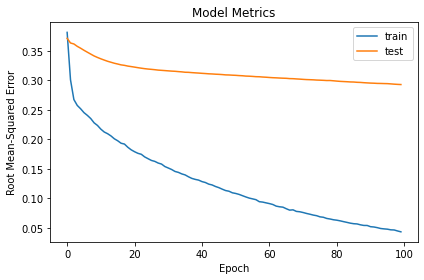

In [ ]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('Model Metrics')
plt.ylabel('Root Mean-Squared Error')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()
plt.savefig('model_metrics.png')
plt.show()

**Lakukan Rekomendasi**

In [ ]:
df2 = data2.copy()

# Mengambil sample user
user_id = df2['User ID'].sample(1).iloc[0]
drama_rated_by_user = df2[df2['User ID'] == user_id]
 
# Operator bitwise (~)
drama_not_rated = df2[~df2['Title'].isin(drama_rated_by_user.Title.values)]['Title'] 
drama_not_rated = list(
    set(drama_not_rated)
    .intersection(set(drama_to_drama_encoded.keys()))
)
 
drama_not_rated = [[drama_to_drama_encoded.get(x)] for x in drama_not_rated]
user_encoder = user_to_user_encoded.get(user_id)
user_drama_array = np.hstack(
    ([[user_encoder]] * len(drama_not_rated), drama_not_rated)
)

In [ ]:
ratings = model.predict(user_drama_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_drama_ids = [
    drama_encoded_to_drama.get(drama_not_rated[x][0]) for x in top_ratings_indices
]
 
print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Drama with high ratings from user')
print('----' * 8)
 
top_drama_user = (
    drama_rated_by_user.sort_values(
        by = 'Rating',
        ascending=False
    )
    .head(5)
    .Title.values
)
 
drama_df_rows = df1[df1['Title'].isin(top_drama_user)]
for row in drama_df_rows.itertuples():
    print(row.Title, ':', row.Genre)
 
print('----' * 8)
print('Top drama recommendation')
print('----' * 8)
 
recommended_drama = df1[df1['Title'].isin(recommended_drama_ids)]
for row in recommended_drama.itertuples():
    print(row.Title, ':', row.Genre)

30/30 [==============================] - 0s 2ms/step
Showing recommendations for users: USER2087
Drama with high ratings from user
--------------------------------
Record of Youth : Drama, Romance
--------------------------------
Top drama recommendation
--------------------------------
One Ordinary Day : Crime, Mystery
It's Okay to Not Be Okay : Comedy, Drama, Romance
The Flower of Evil : Crime, Mystery, Romance
Friend, Our Legend : Action, Crime, Drama
Team Bulldog: Off-duty Investigation : Action, Crime, Drama
On the Way to the Airport : Drama, Romance


## Evaluation

In [ ]:
# Menampilkan RMSE untuk Collaboratibe Filtering
val_rmse = history.history['val_root_mean_squared_error'][-1]
train_rmse = history.history['root_mean_squared_error'][-1]

rmse_dict = {'train' : train_rmse, 'validation': val_rmse}

metrics_df = pd.DataFrame(rmse_dict, index = ['Colaborative RMSE'])
metrics_df

,train,validation
Colaborative RMSE,0.043502,0.29282


In [170]:
count = 0

for i in kdrama_recommendations(title_idx)['Genre']:
  positive = 0
  for j in df1[df1.Title.eq(title_idx)].loc[idx, 'Genre'].split(','):
    # Cek apakah ada kecocokan genre, minimal 1 yang cocok
    if (i.find(j) >= 0):
      positive += 1
  
  # Jika ada yang cocok, tambahkan satu
  if (positive > 0):
    count +=1 

precision = 100*(count/5)
prec_dict = {'Positive' : count, 'Negative': 5-count, 'Precision': precision}

metrics_df2 = pd.DataFrame(prec_dict, index = ['Content Prec'])
metrics_df2

,Positive,Negative,Precision
Content Prec,5,0,100.0


Untuk mengukur keberhasilan sistem rekomendasi yang dibuat, digunakan dua metrik:
1. *Root Mean Squared Error* (RMSE) untuk Collaborative Filtering
2. Presisi untuk Content-Based Filtering 

RMSE memberi informasi terkait seberapa besar kesalahan prediksi (*error*) dari model. Kesalahan prediksi diperoleh dengan menghitung selisih dari data prediksi terhadap data sebenarnya. RMSE dihitung dengan mengikuti persamaan di bawah:

$$ MSE = \frac{1}{N} \sum (y_{true} - y_{pred})^2 $$<br>
$$ RMSE = \sqrt{MSE} $$ <br>

Sementara itu, presisi mengukur seberapa tepat sistem rekomendasi dalam menentukan jenis konten yang direkomendasikan. Presisi pada proyek ini diukur dengan melihat genre dari konten yang direkomendasikan dan membandingkannya dengan genre konten yang dimasukkan ke sistem. Apabila ada satu kecocokan, meskipun hanya pada satu genre, prediksi tersebut akan dianggap sebagai *positif*. Sementara itu, apabila tidak ada kecocokan sama sekali, maka prediksi dianggap *negatif*. Presisi kemudian dihitung dengan membandingkan jumlah prediksi positif terhadap total prediksi:

$$ Presisi = \frac{Total Prediksi Positif}{Total Prediksi} \times 100 $$ <br>

Pada proyek ini, sistem rekomendasi dengan tipe Collaborative Filtering memiliki nilai RMSE latih dan validasi masing-masing sebesar 0.043 dan 0.292. Hal ini menunjukkan bahwa model belum memiliki kemampuan generalisasi yang baik dilihat dari RMSE validasi yang masih cukup besar. Hal ini membuka peluang peningkatan kinerja model. Meskipun demikian, model ini tetap mampu memberikan rekomendasi K-Drama meskipun dengan nilai kesalahan yang tidak kecil.

Sementara itu, untuk tipe Content-Based Filtering, sistem rekomendasi yang dibangun berhasil mencapai presisi sebesar 100 persen. Hal ini menunjukkan bahwa model ini memiliki kinerja yang sangat baik untuk memberikan rekomendasi konten K-Drama.

Dengan demikian, proyek ini dapat dikatakan telah mampu menghasilkan dua sistem rekomendasi yang fungsional meskipun dengan kinerja yang masih dapat ditingkatkan. Sistem rekomendasi ini dapat dimanfaatkan untuk berbagai layanan yang menyediakan konten hiburan berisi K-Drama.

